<h1>Содержание<span class="tocSkip"></span></h1>

## Описание проекта

### Основные положения

## Изучение файлов данных

### Библиотеки

In [1]:
# достаём библиотеки
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st

# библиотека сиборн для визуализации на Питоне поверх matplotlib
import seaborn as sns

In [2]:
# Импорт библиотеки высокоуровневых математических функций
import numpy as np

In [3]:
# лаконичный, последовательный, высокоуровневый API для создания фигур
import plotly.express as px

In [4]:
import plotly.graph_objects as go

In [5]:
# уберём warnings
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [6]:
import datetime as dt

In [7]:
import scipy.stats as stats

In [8]:
# Модуль Re для регулярных выражений в Python
import re

### Настройки

In [9]:
# format вывода значений в виде числа с 2-мя знаками после запятой
pd.options.display.float_format = '{:,.2f}'.format

In [10]:
# количество отображаемых столбцов
# pd.options.display.max_columns = 200
pd.set_option('max_columns',None)

### Вывод и изучение данных
<a id="start"></a>

In [11]:
# конструкция для работы с путями файлов на локальной машине и на сервере Практикума
try:
    rest_data = pd.read_csv('/datasets/rest_data.csv', sep=',')
except:
    rest_data = pd.read_csv('my_datasets/rest_data.csv', sep=',')
    
display(rest_data.head(10))

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [12]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


### Изучение пропущенных значений

Подозрительных пропущенных значений не отмечено

### Описание данных

Таблица *rest_data*:
- **id** — идентификатор объекта;
- **object_name** — название объекта общественного питания;
- **chain** — сетевой ресторан;
- **object_type** — тип объекта общественного питания;
- **address** — адрес;
- **number** — количество посадочных мест.

### Вывод

Мы описали наше цели и задачи. Пропущенных значения мы не отметили. Описали данные из таблицы

## Предобработка данных
<a id="preprocessing"></a>

### Изучение данных
<a id="learning"></a>

In [13]:
# в цикле выводим `value_counts()` для каждого столбца

for col in rest_data.columns:
    print(str(col))
    display(rest_data[col].value_counts())

id


27662     1
223307    1
185071    1
23278     1
21451     1
         ..
155041    1
21920     1
107934    1
26006     1
163840    1
Name: id, Length: 15366, dtype: int64

object_name


Столовая                              267
Кафе                                  236
Шаурма                                234
KFC                                   155
Шоколадница                           142
                                     ... 
13 RULES KRAFT BEER                     1
Океан Суши                              1
Буффетум                                1
СТОЛОВАЯ при кс Мосфильм                1
СТОЛОВАЯ ПРИ АВТОДОРОЖНОМ КОЛЛЕДЖЕ      1
Name: object_name, Length: 10393, dtype: int64

chain


нет    12398
да      2968
Name: chain, dtype: int64

object_type


кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

address


город Москва, Ходынский бульвар, дом 4              95
город Москва, Пресненская набережная, дом 2         63
город Москва, проспект Мира, дом 211, корпус 2      60
город Москва, Кировоградская улица, дом 13А         53
город Москва, площадь Киевского Вокзала, дом 2      48
                                                    ..
город Москва, Тимирязевская улица, дом 58            1
город Москва, 3-я Песчаная улица, дом 2              1
город Москва, Плетешковский переулок, дом 2          1
город Москва, 1-я улица Машиностроения, дом 3/5А     1
город Москва, проспект Мира, дом 48, строение 6      1
Name: address, Length: 9108, dtype: int64

number


0      1621
40      835
20      727
30      685
10      644
       ... 
491       1
675       1
455       1
167       1
495       1
Name: number, Length: 315, dtype: int64

Подозрительх отрицательных значений не отмечено

### Работа с дублкатами

<a id="duplicates"></a>

In [14]:
# поищем дубликаты
rest_data.duplicated().sum()

0

In [15]:
# удалим уникальные индификаторы, чтобы лучше изучить
rest_data_duplicat = rest_data.drop(['id'], axis=1)
rest_data_duplicat.duplicated().sum()

82

In [16]:
# посмотрим на них
rest_data_duplicat = rest_data_duplicat[rest_data_duplicat.duplicated(keep=False)]
rest_data_duplicat.head(8)

,object_name,chain,object_type,address,number
2374,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
2381,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
2869,LALTRO BOSCO,нет,ресторан,"город Москва, улица Петровка, дом 10",145
3480,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
3481,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
4430,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4431,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4536,Столовая «Комбинат питания КОСМОС»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15


Мы нашли точки питания по одному адресу. Такое возможно

### Работа с пропущенными значениями

<a id="null"></a>

Ранее мы их не смогли найти

### Работа с типами данных
<a id="type"></a>

In [17]:
rest_data['number'] = rest_data['number'].astype('int32')

In [18]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int32
dtypes: int32(1), int64(1), object(4)
memory usage: 660.4+ KB


Столбцов, которые нужно привести к формату времени тут нет. Хотя бы столбец с номерами сделаем менее затратным для памяти

### Вывод

Мы изучили данные. Пропущенных значений нет. Дубликатов нет. Немного поработали с форматами

## Анализ данных

### Соотношение видов объектов общественного питания по количеству.

In [19]:
# создадим сводную таблицу для построения графика:
rest_data_object_type_count = rest_data.pivot_table(index=['object_type'], 
                                        values='object_name', aggfunc='count')
rest_data_object_type_count = rest_data_object_type_count.sort_values(by='object_name', ascending=False)
rest_data_object_type_count.head(10)

,object_name
object_type,
кафе,6099
столовая,2587
ресторан,2285
предприятие быстрого обслуживания,1923
бар,856
буфет,585
кафетерий,398
закусочная,360
магазин (отдел кулинарии),273


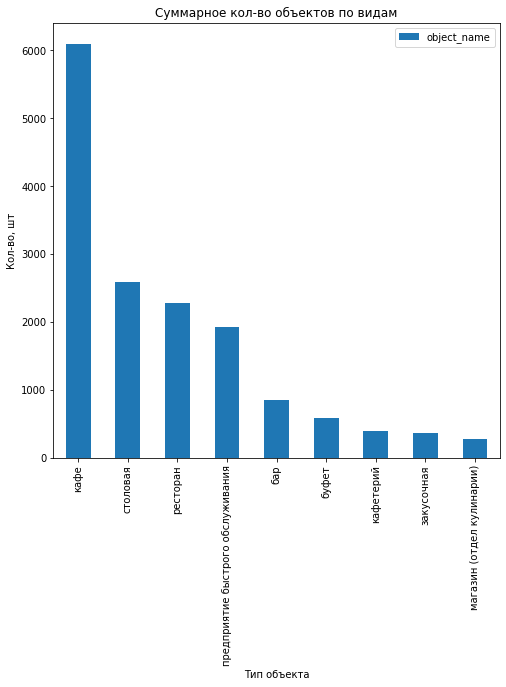

In [20]:
# построим гистограмму
rest_data_object_type_count.plot(y='object_name',
                      kind='bar',
                      figsize=(8, 8))
plt.title('Суммарное кол-во объектов по видам')
plt.ylabel('Кол-во, шт')
plt.xlabel('Тип объекта')
plt.show()

Явный лидер у нас "кафе". Дальше с большим отставанием идут столовые и рестораны

### Соотношение сетевых и несетевых заведений по количеству

In [21]:
# создадим сводную таблицу для построения графика:
rest_data_chain = rest_data.pivot_table(index=['object_type'], 
                                        columns='chain', values='object_name', aggfunc='count')
rest_data_chain.head(10)

chain,да,нет
object_type,,
бар,37,819
буфет,11,574
закусочная,56,304
кафе,1396,4703
кафетерий,52,346
магазин (отдел кулинарии),78,195
предприятие быстрого обслуживания,791,1132
ресторан,544,1741
столовая,3,2584


In [22]:
rest_data_chain['type_chain'] = rest_data_chain['да'] / (rest_data_chain['да'] + rest_data_chain['нет']) * 100
rest_data_chain.head(10)

chain,да,нет,type_chain
object_type,,,
бар,37,819,4.32
буфет,11,574,1.88
закусочная,56,304,15.56
кафе,1396,4703,22.89
кафетерий,52,346,13.07
магазин (отдел кулинарии),78,195,28.57
предприятие быстрого обслуживания,791,1132,41.13
ресторан,544,1741,23.81
столовая,3,2584,0.12


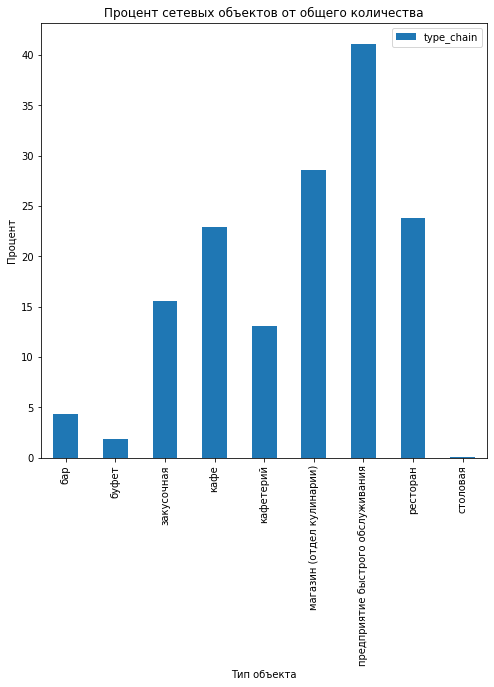

In [23]:
# построим гистограмму
rest_data_chain.plot(y='type_chain',
                      kind='bar',
                      figsize=(8, 8))
plt.title('Процент сетевых объектов от общего количества')
plt.ylabel('Процент')
plt.xlabel('Тип объекта')
plt.show()

Я подсчитал процент сетевых объектов от общего числа по каждому типу объектов. Лидерами оказались предприятия быстрого обслуживания с 41,1%, далее магазины (отдел кулинарии):28.5% и рестораны:23,8%

### Что характерно для сетевых заведений?

In [24]:
# делаем срез
rest_data_number = rest_data.query('chain == "да"')
rest_data_number.head()

,id,object_name,chain,object_type,address,number
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,Алло Пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,Тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160


In [25]:
# созданим функцию для создания категорий для посадочных мест
def number_count_type(row):
    number_count = row['number']
        
    if number_count <= 20:
        return 'Мало мест'
    if 20 < number_count <= 60:
        return 'Среднее количество'
    if 60 < number_count <= 100:
        return 'Большое количество'
    return 'Очень много мест'

# создадим новый столбец, пременив функцию к столбцу   
rest_data_number['number_type'] = rest_data_number.apply(number_count_type, axis=1)
rest_data_number.head()   

,id,object_name,chain,object_type,address,number,number_type
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Среднее количество
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,Мало мест
13,22579,Алло Пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32,Среднее количество
16,144107,Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7,Мало мест
18,58565,Тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160,Очень много мест


In [26]:
# создадим сводную таблицу для построения графика:
rest_data_number_count = rest_data_number.pivot_table(index=['number_type'], 
                                        values='object_type', aggfunc='count')

rest_data_number_count.head()

,object_type
number_type,
Большое количество,518
Мало мест,1019
Очень много мест,346
Среднее количество,1085


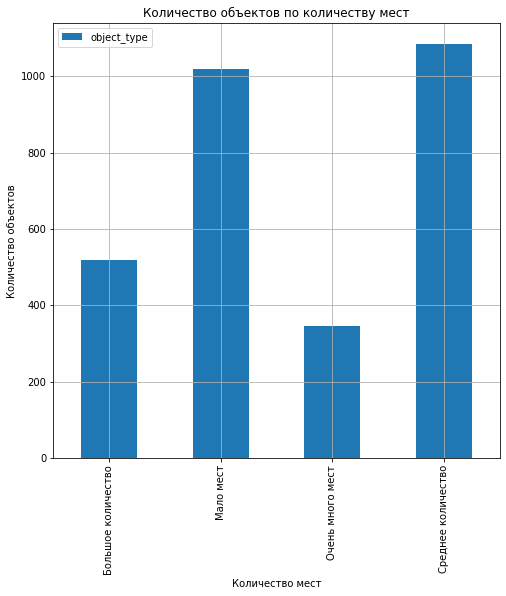

In [27]:
# построим линейный график
rest_data_number_count.plot(y='object_type',
                        kind='bar',
                        grid=True,
                        style='-',
                        figsize=(8, 8))     
plt.title('Количество объектов по количеству мест')
plt.ylabel('Количество объектов')
plt.xlabel('Количество мест')
plt.show()

Мы создали категории по количеству мест для сетевых объектов и посчитали их количество:
- Мало (до 20 мест): 1019
- Среднее количество (от 20 до 60): 1085
- Большое количество (от 60 до 100): 518
- Очень много (от 100 и выше): 346

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест

In [28]:
# создадим сводную таблицу для построения графика:
rest_data_number_new = rest_data_number.pivot_table(index=['object_type'], 
                                        values='number', aggfunc='mean')
rest_data_number_new = rest_data_number_new['number'].sort_values()
rest_data_number_new

object_type
магазин (отдел кулинарии)             8.68
кафетерий                            12.27
буфет                                12.73
закусочная                           14.38
предприятие быстрого обслуживания    40.17
кафе                                 47.43
бар                                  53.03
ресторан                            100.23
столовая                            112.33
Name: number, dtype: float64

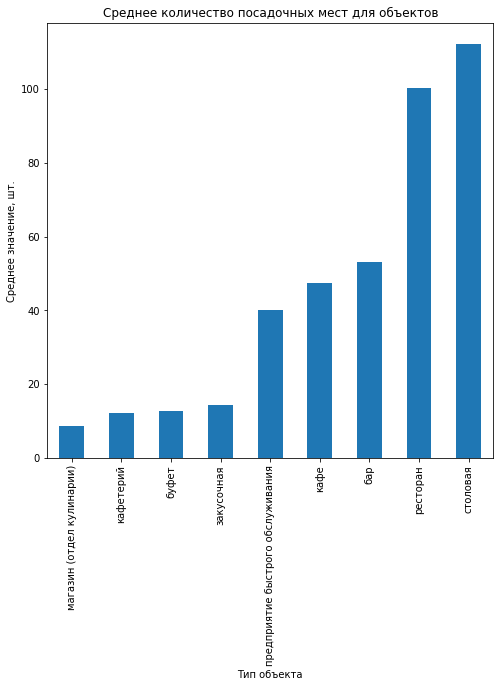

In [29]:
rest_data_number_new.plot(y='number',
                      kind='bar',
                      figsize=(8, 8))
plt.title('Среднее количество посадочных мест для объектов')
plt.ylabel('Среднее значение, шт.')
plt.xlabel('Тип объекта')
plt.show()

Мы вычисли среднее количество посадочных мест для различных объектов. Мало мест (меньше 20) характерно для:
- магазины (отдел кулинарии): 8.68
- кафетерий: 12.27
- буфет: 12.73
- закусочные: 14.38

Для предприятий быстрого обслуживания, кафе и баров характерно в среднем 40-55 посадочных мест. А для ресторанов и столовых в среднем больше 100 мест

### Постройте график топ-10 улиц по количеству объектов общественного питания

In [30]:
# достанем модуль re для регулярных выражений
import re

# используем для выделения улиц в адресе
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

In [31]:
rest_data['street'] = rest_data['address'].str.extract(str_pat, flags=re.I)    
rest_data

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


In [32]:
# создадим сводную таблицу для построения графика:
rest_data_street = rest_data.pivot_table(index=['street'], 
                                        values='object_name', aggfunc='count')

rest_data_street = rest_data_street.sort_values(by='object_name', ascending=False).head(10)
rest_data_street

,object_name
street,
проспект Мира,204
Профсоюзная улица,182
Ленинградский проспект,171
Пресненская набережная,167
Варшавское шоссе,164
Ленинский проспект,147
проспект Вернадского,132
Кутузовский проспект,114
Каширское шоссе,112


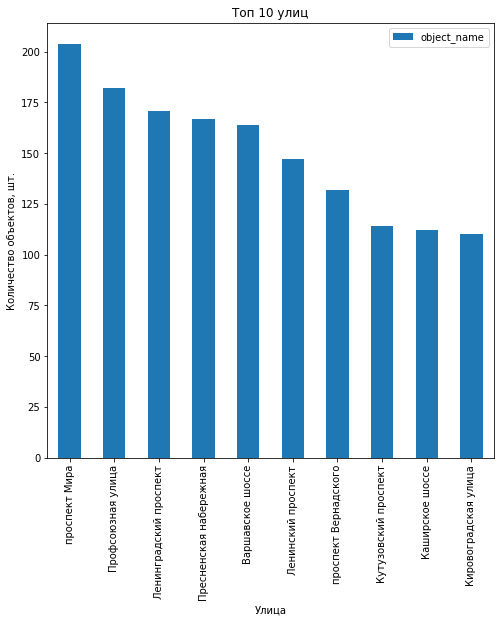

In [33]:
rest_data_street.plot(y='object_name',
                      kind='bar',
                      figsize=(8, 8))
plt.title('Топ 10 улиц')
plt.ylabel('Количество объектов, шт.')
plt.xlabel('Улица')
plt.show()

Мы составили топ улиц по количеству объектов питания. Оно и не удивительно, это самые протяжённые улицы и по ним перемещается основной поток людей, начинаются от садового кольца и идут зачастую до МКАДа.

### Найдите число улиц с одним объектом общественного питания

In [34]:
rest_data_street.sort_values(by='object_name', ascending=True).head(10)

,object_name
street,
Кировоградская улица,110
Каширское шоссе,112
Кутузовский проспект,114
проспект Вернадского,132
Ленинский проспект,147
Варшавское шоссе,164
Пресненская набережная,167
Ленинградский проспект,171
Профсоюзная улица,182


In [35]:
rest_data_street[rest_data_street['object_name'] == 1].count()

object_name    0
dtype: int64

Число улиц с одним объектом составило 551. В основном это маленькие переулки и там тяжело разместить большее количество объектом и поток людей маленький

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

In [36]:
# сгруппируем
rest_data_street_number = rest_data.groupby('street').agg({'object_name':'count', 'number':'mean'})

rest_data_street_number.sort_values(by='object_name', ascending=False).head(10)

,object_name,number
street,,
проспект Мира,204,62.70
Профсоюзная улица,182,46.41
Ленинградский проспект,171,52.69
Пресненская набережная,167,45.84
Варшавское шоссе,164,52.48
Ленинский проспект,147,63.47
проспект Вернадского,132,66.97
Кутузовский проспект,114,85.06
Каширское шоссе,112,55.10


На больших улицах с большим количество объектов среднем количество мест от 50 до 60. Выделяется Кутузовский проспект со средним 85 мест.

### Воспользуйтесь внешней информацией

https://docs.google.com/spreadsheets/d/1xoBMzhEfiDeFqF0rYrG-SVLzqv5I5CH7MowOGhGJ2Do/edit?usp=sharing

In [46]:
from io import BytesIO
import requests

spreadsheet_id = '1xoBMzhEfiDeFqF0rYrG-SVLzqv5I5CH7MowOGhGJ2Do'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content), error_bad_lines=False)
df

,UM_CODE,UM_NAMEF,global_id,UM_NAMES,UM_TRANS,UM_TYPE,UM_TM,UM_TE,UM_KLADR
0,8880,1-й Ирининский переулок,58481065,1-й Ирининский пер.,Pervy'j Irininskij pereulok,2,NaN,0102,77000000000706300
1,8890,2-й Ирининский переулок,58481066,2-й Ирининский пер.,Vtoroj Irininskij pereulok,2,NaN,0102,77000000000362200
2,8891,3-й Ирининский переулок,58481067,3-й Ирининский пер.,Tretij Irininskij pereulok,2,NaN,0102,77000000000362300
3,8910,Иркутская улица,58481068,Иркутская ул.,Irkutskaya ulicza,1,NaN,0406,77000000000139700
4,8920,1-й Иртышский проезд,58481069,1-й Иртышский пр.,Pervy'j Irty'shskij proezd,3,NaN,0406,77000000000331600
...,...,...,...,...,...,...,...,...,...
5292,50270,улица Эдуарда Стрельцова,1125088386,ул. Эдуарда Стрельцова,ulicza E`duarda Strel`czova,1,NaN,0609,NaN
5293,50275,улица Виктора Маслова,1125088394,ул. Виктора Маслова,ulicza Viktora Maslova,1,NaN,0609,NaN
5294,50280,площадь Чайковского,1125088421,пл. Чайковского,ploshhad` Chajkovskogo,4,NaN,0106,NaN
5295,50285,Бархатный переулок,1125088429,Бархатный пер.,Barxatny`j pereulok,2,NaN,0811,NaN


## Вывод и рекомендации

<a id="conclusions_and_recommendations"></a>

Самая большая конкуренция среди:
- кафе 6099 ед
- столовые 2587 ед
- рестораны 2285 ед

Процент сетевых точек от общего числа:
- Лидерами оказались предприятия быстрого обслуживания с 41,1%
- магазины (отдел кулинарии): 28.5% 
- рестораны: 23,8%

Количество сетевых объектов и характерное количество мест для них:
- Мало (до 20 мест): 1019
- Среднее количество (от 20 до 60): 1085
- Большое количество (от 60 до 100): 518
- Очень много (от 100 и выше): 346

Среднее количество посадочных мест для различных объектов. Мало мест (меньше 20) характерно для:
- магазины (отдел кулинарии): 8.68
- кафетерий: 12.27
- буфет: 12.73
- закусочные: 14.38

Для предприятий быстрого обслуживания, кафе и баров характерно в среднем 40-55 посадочных мест. А для ресторанов и столовых в среднем больше 100 мест

На больших улицах с больше всего объектов, и среднем количеством мест от 50 до 60. Выделяется Кутузовский проспект со средним 85 мест.

## Ссылки

Презентация: <https://disk.yandex.ru/i/1ctCLgBaw1Vajg>